In [114]:
# Starter
!pip3 install fastai==0.7.0
!pip install torchtext==0.2.3

In [116]:
#Starter
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [120]:
!pip install kaggle-cli

In [0]:
!mv kaggle.json .kaggle/ 

In [121]:
## Access Kaggle.json API via Google Drive

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [35]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2665           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10230            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4416            True  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         31           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2198           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2902           False  
LANL-Ear

In [36]:
!kaggle competitions files -c dog-breed-identification

name                        size  creationDate         
-------------------------  -----  -------------------  
labels.csv.zip             214KB  2017-09-28 20:49:39  
sample_submission.csv.zip  281KB  2017-09-28 20:49:39  
test.zip                   346MB  2017-09-28 20:50:18  
train.zip                  345MB  2017-09-28 20:50:19  


In [37]:
!kaggle competitions download  -c dog-breed-identification -p /content/kaggle

  0% 0.00/214k [00:00<?, ?B/s]
100% 214k/214k [00:00<00:00, 65.1MB/s]
  0% 0.00/281k [00:00<?, ?B/s]
100% 281k/281k [00:00<00:00, 90.8MB/s]
 99% 342M/346M [00:03<00:00, 134MB/s]
100% 346M/346M [00:03<00:00, 115MB/s]
 97% 335M/345M [00:03<00:00, 76.5MB/s]
100% 345M/345M [00:04<00:00, 88.3MB/s]


In [38]:
!ls

adc.json  data	kaggle	sample_data


In [39]:
!ls kaggle

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


In [40]:
!ls data

dogscats


In [41]:
!unzip kaggle/labels.csv.zip

Archive:  kaggle/labels.csv.zip
  inflating: labels.csv              


In [42]:
!ls kaggle

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


In [43]:
!ls

adc.json  data	kaggle	labels.csv  sample_data


In [45]:
!unzip kaggle/test.zip

Archive:  kaggle/test.zip
   creating: test/
  inflating: test/000621fb3cbb32d8935728e48679680e.jpg  
  inflating: test/00102ee9d8eb90812350685311fe5890.jpg  
  inflating: test/0012a730dfa437f5f3613fb75efcd4ce.jpg  
  inflating: test/001510bc8570bbeee98c8d80c8a95ec1.jpg  
  inflating: test/001a5f3114548acdefa3d4da05474c2e.jpg  
  inflating: test/00225dcd3e4d2410dd53239f95c0352f.jpg  
  inflating: test/002c2a3117c2193b4d26400ce431eebd.jpg  
  inflating: test/002c58d413a521ae8d1a5daeb35fc803.jpg  
  inflating: test/002f80396f1e3db687c5932d7978b196.jpg  
  inflating: test/0036c6bcec6031be9e62a257b1c3c442.jpg  
  inflating: test/0041940322116ae58c38130f5a6f71f9.jpg  
  inflating: test/0042d6bf3e5f3700865886db32689436.jpg  
  inflating: test/004476c96f575879af4af471af65cae8.jpg  
  inflating: test/00485d47de966a9437ad3b33ac193b6f.jpg  
  inflating: test/00496f65de6cc319145ce97bd6e90360.jpg  
  inflating: test/004bf14426d1a830d459a9e0c0721309.jpg  
  inflating: test/004c3721eb88358f462cdcec6

In [46]:
!ls

adc.json  data	kaggle	labels.csv  sample_data  test


In [47]:
!unzip kaggle/train.zip

Archive:  kaggle/train.zip
   creating: train/
  inflating: train/000bec180eb18c7604dcecc8fe0dba07.jpg  
  inflating: train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
  inflating: train/001cdf01b096e06d78e9e5112d419397.jpg  
  inflating: train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
  inflating: train/0021f9ceb3235effd7fcde7f7538ed62.jpg  
  inflating: train/002211c81b498ef88e1b40b9abf84e1d.jpg  
  inflating: train/00290d3e1fdd27226ba27a8ce248ce85.jpg  
  inflating: train/002a283a315af96eaea0e28e7163b21b.jpg  
  inflating: train/003df8b8a8b05244b1d920bb6cf451f9.jpg  
  inflating: train/0042188c895a2f14ef64a918ed9c7b64.jpg  
  inflating: train/004396df1acd0f1247b740ca2b14616e.jpg  
  inflating: train/0067dc3eab0b3c3ef0439477624d85d6.jpg  
  inflating: train/00693b8bc2470375cc744a6391d397ec.jpg  
  inflating: train/006cc3ddb9dc1bd827479569fcdc52dc.jpg  
  inflating: train/0075dc49dab4024d12fafe67074d8a81.jpg  
  inflating: train/00792e341f3c6eb33663e415d0715370.jpg  
  inflating: train/007b5a

In [48]:
!ls

adc.json  data	kaggle	labels.csv  sample_data  test  train


In [0]:
!mkdir dogbreeds

In [0]:
!mv labels.csv dogbreeds/

In [51]:
!ls dogbreeds

labels.csv


In [0]:
!mv dogbreeds/ data/

In [63]:
!ls data

dogbreeds  dogscats


In [0]:
PATH = 'data/dogbreeds/'
sz = 224
arch = resnext101_64
bs=16

In [0]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [66]:
!ls {PATH}

labels.csv  test  train


In [67]:
label_df = pd.read_csv(label_csv)
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [68]:
label_df.pivot_table(index='breed', aggfunc=len).sort_values('id', ascending=False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [0]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, 
                       max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', 
                 f'{PATH}labels.csv', test_name='test', 
                 val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)

In [106]:
fn = PATH + data.trn_ds.fnames[0]
fn

'data/dogbreeds/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

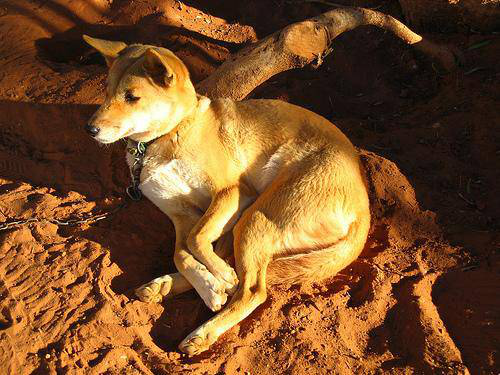

In [71]:
img = PIL.Image.open(fn); img

In [73]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
size_d

{'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg': (500, 375),
 'train/001cdf01b096e06d78e9e5112d419397.jpg': (500, 375),
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg': (500, 500),
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg': (500, 375),
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg': (500, 470),
 'train/002a283a315af96eaea0e28e7163b21b.jpg': (231, 227),
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg': (500, 332),
 'train/0067dc3eab0b3c3ef0439477624d85d6.jpg': (402, 343),
 'train/006cc3ddb9dc1bd827479569fcdc52dc.jpg': (250, 223),
 'train/00792e341f3c6eb33663e415d0715370.jpg': (200, 192),
 'train/007b5a16db9d9ff9d7ad39982703e429.jpg': (374, 212),
 'train/007b8a07882822475a4ce6581e70b1f8.jpg': (333, 500),
 'train/007ff9a78eba2aebb558afea3a51c469.jpg': (500, 375),
 'train/008ba178d6dfc1a583617470d19c1673.jpg': (390, 320),
 'train/009509be3ca7cce0ff9e37c8b09b1125.jpg': (400, 346),
 'train/00a338a92e4e7bf543340dc849230e75.jpg': (200, 280),
 'train/00a366d4b4a9bbb6c8a63126697b7656.jpg': (500, 375

In [0]:
row_sz, col_sz = list(zip(*size_d.values()))

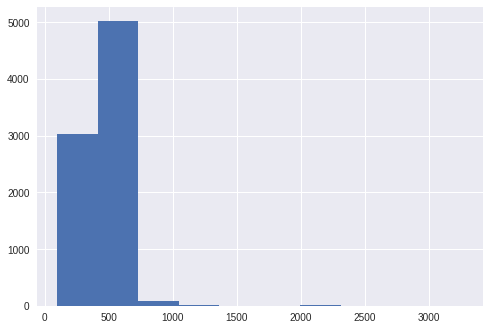

In [75]:
plt.hist(row_sz);

In [0]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on,
                           max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', 
               f'{PATH}labels.csv', test_name='test', num_workers=4,
               val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz>300 else data.resize(340, 'tmp')

In [94]:
data = get_data(224, bs)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 5)

epoch      trn_loss   val_loss   accuracy   
    0      1.077051   0.673231   0.793542  
    1      0.842208   0.603472   0.810176  
    2      0.75646    0.612076   0.808708  
    3      0.651834   0.568263   0.815558  
    4      0.573752   0.573015   0.825342  



[array([0.57302]), 0.8253424656367815]

In [95]:
learn.precompute = False
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.627403   0.543247   0.83317   
    1      0.669755   0.542601   0.828767  
    2      0.621748   0.541197   0.831703  
    3      0.631939   0.555849   0.831703  
    4      0.650962   0.545354   0.835127  



[array([0.54535]), 0.8351272014489146]

In [84]:
!wget http://files.fast.ai/models/weights.tgz && unzip -qq weights.zip data/

--2019-01-26 06:52:17--  http://files.fast.ai/models/weights.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195411318 (1.1G) [text/plain]
Saving to: ‘weights.tgz’

weights.tgz         100%[===================>]   1.11G  15.7MB/s    in 75s     

2019-01-26 06:53:32 (15.3 MB/s) - ‘weights.tgz’ saved [1195411318/1195411318]

unzip:  cannot find or open weights.zip, weights.zip.zip or weights.zip.ZIP.


In [0]:
learn.save('224_pre')
learn.load('224_pre')

In [112]:
learn.set_data(get_data(299, bs))


In [113]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.425815   0.456669   0.854697  
    1      0.482688   0.458852   0.858611  
    2      0.442365   0.472172   0.854207  



[array([0.47217]), 0.8542074362825741]

In [101]:
-learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.47633    0.454575   0.865949  
    1      0.601276   0.485348   0.850783  
    2      0.554392   0.462461   0.855186  
    3      0.554117   0.47743    0.847847  
    4      0.554426   0.475805   0.851272  
    5      0.466011   0.4493     0.856164  
    6      0.526036   0.457454   0.861057  



[array([0.45745]), 0.8610567513510672]

In [109]:
log_preds, y = learn.TTA()
probs = np.exp(log_preds)
accuracy(log_preds,y), metrics.log_loss(y, probs)

TypeError: ignored

In [100]:
b!ls kaggle

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip
